In [17]:
!unrar x "/content/drive/My Drive/Datasets/Flipkart/Flipkart_data.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Datasets/Flipkart/Flipkart_data.rar

Creating    Flipkart_data                                             OK
Creating    Flipkart_data/After Augmentation                          OK
Creating    Flipkart_data/After Augmentation/Single_prediction        OK
Extracting  Flipkart_data/After Augmentation/Single_prediction/img1.jpg       0%  OK 
Extracting  Flipkart_data/After Augmentation/Single_prediction/img10.jpg       0%  OK 
Extracting  Flipkart_data/After Augmentation/Single_prediction/img11.jpg       0%  OK 
Extracting  Flipkart_data/After Augmentation/Single_prediction/img12.jpg       0%  OK 
Extracting  Flipkart_data/After Augmentation/Single_prediction/img2.jpg       0%  OK 
Extracting  Flipkart_data/After Augmentation/Single_prediction/img3.jpg       0%  OK 
Extracting  Flipkart_data/After Augmentation/Single_prediction

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
cnn_object=Sequential()

In [4]:
cnn_object.add(Conv2D(64,3,3,input_shape=(64,64,3),activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [5]:
cnn_object.add(MaxPool2D(pool_size=(2,2)))

In [6]:
cnn_object.add(Conv2D(32,3,3,activation='relu'))
cnn_object.add(MaxPool2D(pool_size=(2,2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [7]:
cnn_object.add(Flatten())

In [8]:
cnn_object.add(Dense(units=10,activation='relu'))
cnn_object.add(Dense(units=1,activation='sigmoid'))

In [20]:

from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model3.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]


In [58]:
from keras.optimizers import Adam,RMSprop,Nadam,SGD

In [40]:
cnn_object.compile(optimizer=Nadam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=20,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 900 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 112s 1s/step - loss: 0.0298 - accuracy: 0.9931 - val_loss: 1.2942 - val_accuracy: 0.8335

Epoch 00001: val_loss did not improve from 0.79637
Epoch 2/20
100/100 [==============================] - 114s 1s/step - loss: 0.0227 - accuracy: 0.9951 - val_loss: 0.9316 - val_accuracy: 0.8367

Epoch 00002: val_loss did not improve from 0.79637
Epoch 3/20
100/100 [==============================] - 113s 1s/step - loss: 0.0184 - accuracy: 0.9962 - val_loss: 1.3680 - val_accuracy: 0.8333

Epoch 00003: val_loss did not improve from 0.79637
Epoch 4/20
100/100 [==============================] - 112s 1s/step - loss: 0.0150 - accuracy: 0.9978 - val_loss: 1.1075 - val_accuracy: 0.8402

Epoch 00004: val_loss did not improve from 0.79637
Epoch 5/20
100/100 [==============================] - 115s 1s/step - loss: 0.0121 - accuracy: 0.9991 - val_loss: 0.8594 - val_accuracy: 0.

In [42]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model3.h5')

In [43]:
train_set.class_indices

{'Men_Jeans': 0, 'Men_Trouser': 1}

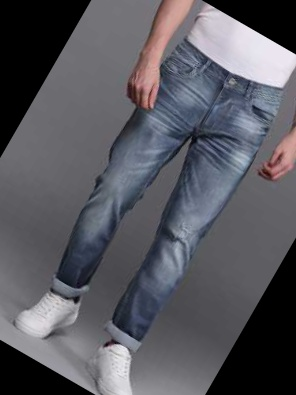


Jeans


In [44]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img4.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img4.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

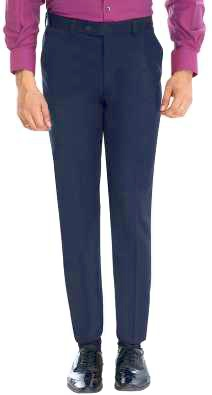


Jeans


In [45]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img11.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img11.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

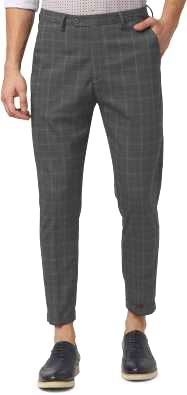


Trouser


In [46]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img10.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img10.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

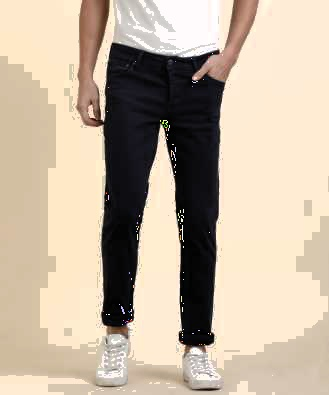


Jeans


In [47]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img9.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img9.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

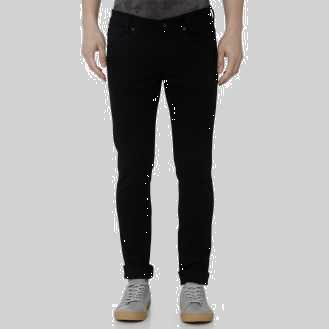


Jeans


In [48]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img1.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img1.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

In [49]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model4.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]


In [50]:
cnn_object.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=20,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 900 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 111s 1s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.5601 - val_accuracy: 0.8508

Epoch 00001: val_loss improved from inf to 2.56006, saving model to model4.h5
Epoch 2/20
100/100 [==============================] - 109s 1s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.4932 - val_accuracy: 0.8541

Epoch 00002: val_loss improved from 2.56006 to 1.49320, saving model to model4.h5
Epoch 3/20
100/100 [==============================] - 111s 1s/step - loss: 0.0055 - accuracy: 0.9998 - val_loss: 1.2021 - val_accuracy: 0.8507

Epoch 00003: val_loss improved from 1.49320 to 1.20213, saving model to model4.h5
Epoch 4/20
100/100 [==============================] - 109s 1s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.4551 - val_accuracy: 0.8610

Epoch 00004: val_loss did not improve from 1.20213
Epoch 5/20
100/100 [=============================

In [52]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model4.h5')

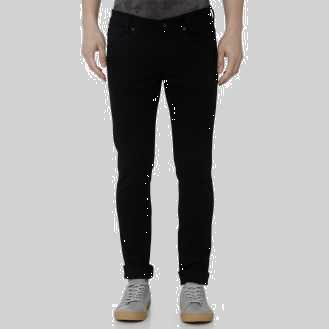


Jeans


In [53]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img1.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img1.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

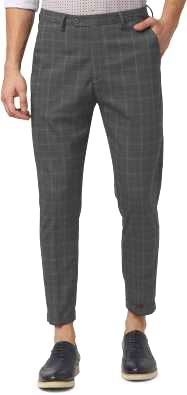


Trouser


In [54]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img10.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img10.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

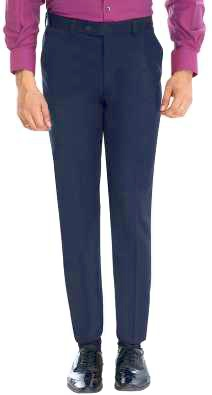


Jeans


In [55]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img11.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img11.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

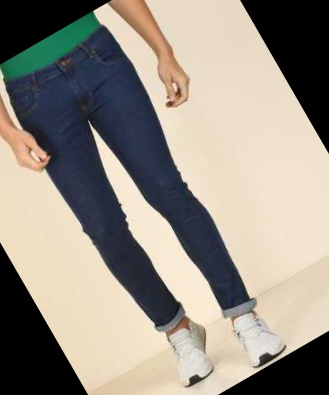


Jeans


In [56]:
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img5.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img5.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

In [57]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model5.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]


In [59]:
cnn_object.compile(optimizer=SGD(momentum=0.50,learning_rate=0.05),loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=20,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 900 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 117s 1s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.4045 - val_accuracy: 0.8507

Epoch 00001: val_loss improved from inf to 2.40449, saving model to model5.h5
Epoch 2/20
100/100 [==============================] - 114s 1s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.2214 - val_accuracy: 0.8507

Epoch 00002: val_loss improved from 2.40449 to 2.22136, saving model to model5.h5
Epoch 3/20
100/100 [==============================] - 115s 1s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.3927 - val_accuracy: 0.8506

Epoch 00003: val_loss improved from 2.22136 to 1.39270, saving model to model5.h5
Epoch 4/20
100/100 [==============================] - 113s 1s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.5285 - val_accuracy: 0.8509

Epoch 00004: val_loss did not improve from 1.39270
Epoch 5/20
100/100 [=============================

In [61]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model5.h5')

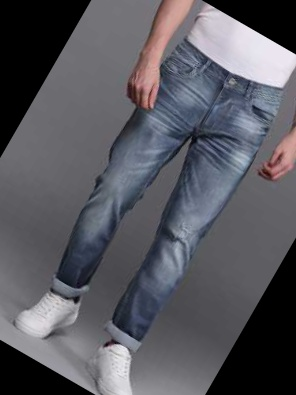


Jeans


In [62]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img4.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img4.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

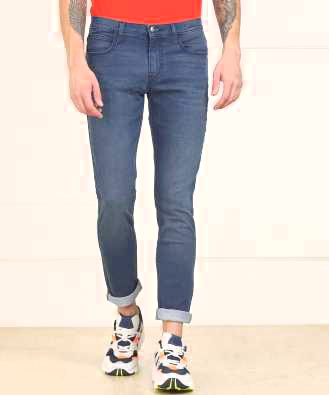


Jeans


In [63]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img2.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img2.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

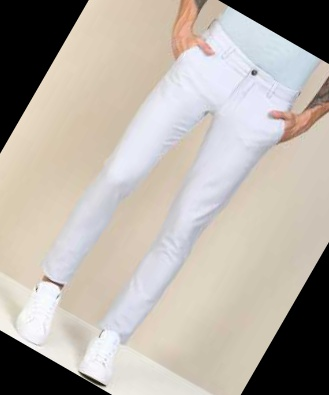


Trouser


In [64]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img8.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img8.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

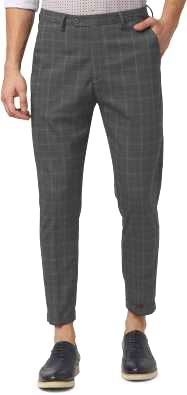


Trouser


In [65]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img10.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img10.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

In [66]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model6.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]


In [68]:
cnn_object.compile(optimizer=RMSprop(learning_rate=0.05),loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/Flipkart_data/After Augmentation/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=20,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 900 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 112s 1s/step - loss: 0.9786 - accuracy: 0.4958 - val_loss: 0.6967 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69673, saving model to model6.h5
Epoch 2/20
100/100 [==============================] - 110s 1s/step - loss: 0.7019 - accuracy: 0.4920 - val_loss: 0.6919 - val_accuracy: 0.4999

Epoch 00002: val_loss improved from 0.69673 to 0.69194, saving model to model6.h5
Epoch 3/20
100/100 [==============================] - 111s 1s/step - loss: 0.6992 - accuracy: 0.5020 - val_loss: 0.6897 - val_accuracy: 0.5003

Epoch 00003: val_loss improved from 0.69194 to 0.68972, saving model to model6.h5
Epoch 4/20
100/100 [==============================] - 111s 1s/step - loss: 0.6982 - accuracy: 0.4947 - val_loss: 0.6923 - val_accuracy: 0.4998

Epoch 00004: val_loss did not improve from 0.68972
Epoch 5/20
100/100 [=============================

In [70]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model6.h5')

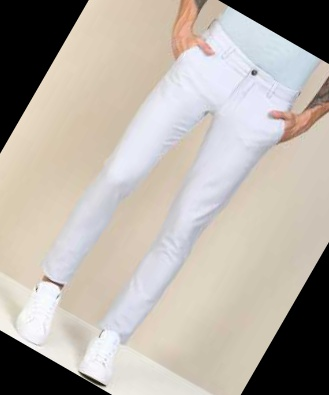


Jeans


In [71]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img8.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img8.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

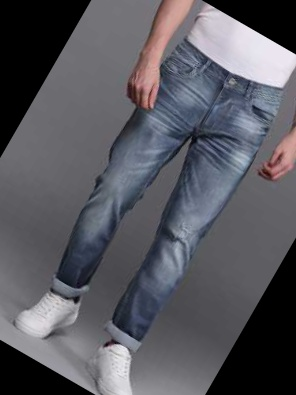


Jeans


In [72]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img4.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img4.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

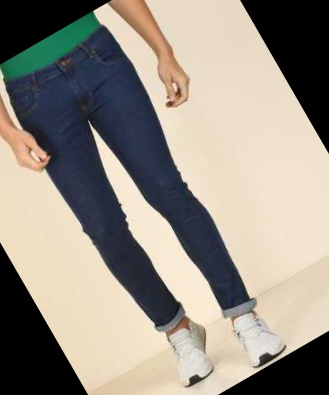


Jeans


In [73]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img5.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img5.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

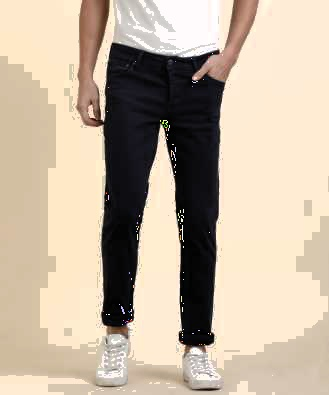


Jeans


In [74]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/After Augmentation/Single_prediction/img9.jpg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/After Augmentation/Single_prediction/img9.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')